In [1]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_csv('ex2data2.txt', names=['Test 1', 'Test 2', 'Accepted'])
df.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
df.describe()

,Test 1,Test 2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [4]:
positive = df[df['Accepted'] == 1]
negative = df[df['Accepted'] == 0]

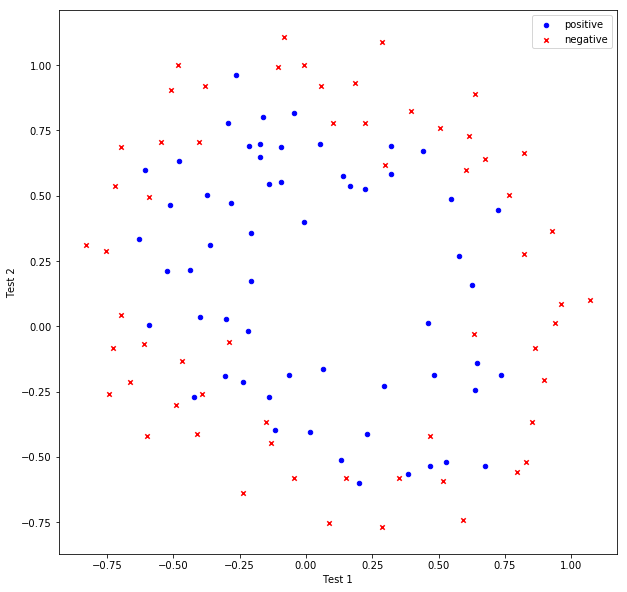

In [5]:
plt.figure(figsize=(10, 10))
plt.scatter(positive['Test 1'], positive['Test 2'], c='b', s=20, marker='o', label='positive')
plt.scatter(negative['Test 1'], negative['Test 2'], c='r', s=20, marker='x', label='negative')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()

In [6]:
X_total = df.iloc[:, :-1]
Y_total = df.iloc[:, -1]

In [7]:
classifier = LogisticRegression(max_iter=500)
classifier.fit(X_total, Y_total)
classifier.score(X_total, Y_total)

0.5423728813559322

In [8]:
X_total.shape

(118, 2)

### 可以看到数据集不能用一条线进行分隔，所以准备构造多项式回归来拟合数据

In [9]:
degree = 4

for i in range(1, degree + 1):
    for j in range(0, i + 1):
        df['Test{0}{1}'.format(j, i-j)] = np.power(X_total.values[:, 0], j) * np.power(X_total.values[:, 1], i-j)
        
df.drop('Test 1', axis=1, inplace=True)
df.drop('Test 2', axis=1, inplace=True)

In [10]:
df.head()

,Accepted,Test01,Test10,Test02,Test11,Test20,Test03,Test12,Test21,Test30,Test04,Test13,Test22,Test31,Test40
0,1,0.69956,0.051267,0.489384,0.035864,0.002628,0.342354,0.025089,0.001839,0.000135,0.239497,0.017551,0.001286,0.000094,0.000007
1,1,0.68494,-0.092742,0.469143,-0.063523,0.008601,0.321335,-0.043509,0.005891,-0.000798,0.220095,-0.029801,0.004035,-0.000546,0.000074
2,1,0.69225,-0.213710,0.479210,-0.147941,0.045672,0.331733,-0.102412,0.031616,-0.009761,0.229642,-0.070895,0.021886,-0.006757,0.002086
3,1,0.50219,-0.375000,0.252195,-0.188321,0.140625,0.126650,-0.094573,0.070620,-0.052734,0.063602,-0.047494,0.035465,-0.026483,0.019775
4,1,0.46564,-0.513250,0.216821,-0.238990,0.263426,0.100960,-0.111283,0.122661,-0.135203,0.047011,-0.051818,0.057116,-0.062956,0.069393


In [11]:
X_total = df.iloc[:, 1:].values
Y_total = df.iloc[:, 0].values.reshape(-1, 1)
Y_total[:4]

array([[1],
       [1],
       [1],
       [1]])

In [12]:
print('X_total shape: ', X_total.shape)
print('Y_total shape: ', Y_total.shape)

X_total shape:  (118, 14)
Y_total shape:  (118, 1)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_total, Y_total)

In [14]:
classifier = LogisticRegression(max_iter=2000)
classifier.fit(X_train, Y_train)

/Users/zhangshulin_work/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
classifier.score(X_train, Y_train)

0.82954545454545459

In [16]:
classifier.score(X_test, Y_test)

0.69999999999999996

### 可以看的存在过拟合问题，下面加上L2正则化

In [20]:
classifier_reg = LogisticRegression(C=0.49, penalty='l2', verbose=1, max_iter=2000)
classifier_reg.fit(X_train, Y_train)

[LibLinear]

/Users/zhangshulin_work/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.49, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [21]:
classifier_reg.score(X_train, Y_train)

0.81818181818181823

In [22]:
classifier_reg.score(X_test, Y_test)

0.73333333333333328